Avaliação - Unidade 02
===
José Carlos Emídio Pereira e Yuri Reinaldo da Silva
---
___

Identificação dos alunos (nome completo): 

- Este trabalho irá compor 40% da segunda unidade.
- Grupo de até dois alunos.
- Os alunos deverão enviar (apenas um por grupo) através do Sigaa, o notebook e os datasets gerados na avaliação em um arquivo compactado (.zip). 
- Todas as respostas devem ser realizadas através de código python e os resultados explicados em estilo markdown
- As informações (datasets) necessárias para resolução dos problemas podem ser encontradas em http://dados.ufrn.br/group/ensino


#### 1. (1 ponto) Quantas e quais disciplinas com código IMD foram consolidadas em 2017.1? 
**Dica:** 
>```python
df[df['A'].str.contains("hello")]
```

In [1]:
import pandas as pd
import numpy as np
np.seterr(divide="ignore", invalid="ignore")

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
turmas_total = pd.read_csv('turmas-2017.1.csv', sep=";")

turmas_imd  = turmas_total[turmas_total['codigo'].str.contains("IMD")]

turmas_consolidadas = turmas_imd[turmas_imd["situacao_turma"].str.contains("CONSOLIDADA")]

print("Foram ao todo consolidadas",turmas_consolidadas.shape[0],"Turmas pelo IMD.")
print("É possível ver o nome das disciplinas seguidas pela quantia de turmas a seguir:")
turmas_consolidadas.pivot_table(index="nome_ascii", values="situacao_turma", aggfunc='count')

Foram ao todo consolidadas 103 Turmas pelo IMD.
É possível ver o nome das disciplinas seguidas pela quantia de turmas a seguir:


,situacao_turma
nome_ascii,
ADMINISTRACAO DE SISTEMAS OPERACIONAIS PARA REDES,1
ANALISE ESTATISTICA PARA BIG DATA,1
APRENDIZAGEM DE MAQUINA PARA BIG DATA,1
ARMAZENAMENTO DE BIG DATA,1
AVALIACAO DA INTERACAO HUMANO-COMPUTADOR,1
CALCULO DIFERENCIAL E INTEGRAL I,3
DESENVOLVIMENTO DE PROJETOS DE REDES DE COMPUTADORES,1
DESENVOLVIMENTO DE SISTEMAS WEB II,1
DESIGN DA INTERACAO HUMANO-COMPUTADOR,1


___
#### 2. (3 pontos) Realize um estudo envolvendo as propriedades de **assimétria** e **curtose** para as turmas IMD0033 (probabilidade) consolidadas em 2017.1. Utilize gráficos e explique os resultados. Reforce também os horários das disciplinas nos resultados. 

In [3]:
turmas_prob = turmas_imd[turmas_imd["codigo"].str.contains("IMD0033")]


codigo_turma = list(turmas_prob['id_turma'].unique())
horario_turma = list(turmas_prob['descricao_horario'])

for i in range(len(horario_turma)):
    horario_turma[i] = str(horario_turma[i]).split(' ', 1)[0]

In [4]:
alunos_total = pd.read_csv('matricula-componente-20171.csv', sep=";")

In [5]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis


Os dados para a turma 24M12 são:
Simetria: 4.39
Curtose: 21.38


Os dados para a turma 26N34 são:
Simetria: 3.98
Curtose: 17.36




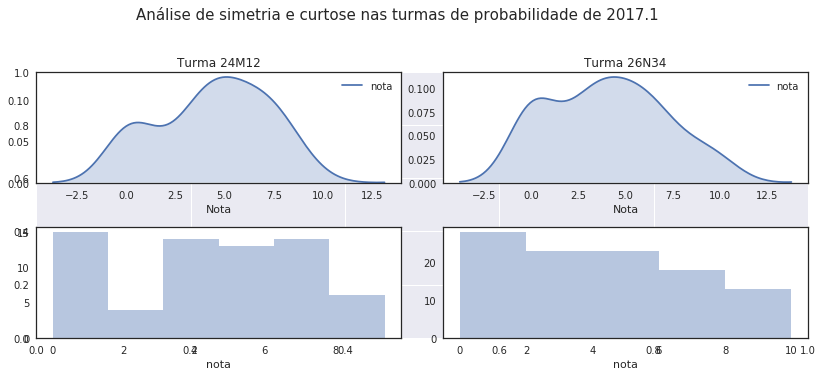

In [6]:
turmas_prob = []
for i in range(len(codigo_turma)):
    alunos_prob = alunos_total[alunos_total["id_turma"] == codigo_turma[i]]
    alunos_prob = alunos_prob.dropna()
    turmas_prob.append(alunos_prob)

sns.set()

sns.set_context("notebook")

fig, axes = plt.subplots( figsize=(12, 5))

sns.set_style("white")
sns.despine(left=True, bottom=True)

skewness_turmas = []
kurtosiness_turmas = []
for i in range(len(turmas_prob)):
    
    skewness = skew(turmas_prob[i]['nota'].value_counts())
    skewness_turmas.append(skewness)
    kurtosiness = kurtosis(turmas_prob[i]['nota'].value_counts())
    kurtosiness_turmas.append(kurtosiness)
    
    axe = fig.add_subplot(2,2,i+1)
    axe2 = fig.add_subplot(2,2,i+3)
    sns.kdeplot(turmas_prob[i]["nota"], shade=True, ax=axe)
    sns.distplot(turmas_prob[i]["nota"], kde=False, ax=axe2)
    axe.set_xlabel('Nota')
    axe.set_title("Turma "+str(horario_turma[i]))
    
    print("Os dados para a turma", str(horario_turma[i]), "são:")
    print("Simetria:", "{0:.2f}".format(skewness_turmas[i]))
    print("Curtose:", "{0:.2f}".format(kurtosiness_turmas[i]))
    print("\n")

plt.suptitle("Análise de simetria e curtose nas turmas de probabilidade de 2017.1", 
             fontsize=15,
            y = 1.09)


plt.tight_layout()
plt.show()

Diferenças de simetria
---
É possível reparar que tanto a turma da manhã quanto a da noite tiveram valores de simetria positivos, o que denota que a maior concentração está do lado esquerdo do histograma, que é aonde ficam concentradas as notas mais baixas. Isso indica que o índice de rendimento em ambas não foi satisfatório, devido à um mal aproveitamento por parte da turma. 
É possível apontar que a turma da manhã teve no geral mais notas abaixo de 5 que a turma da noite, pois sua simetria é maior que a da segunda.

Diferenças de curtose
---
A curtose de ambas resultou em valores altos, sendo que na turma da noite os resultados se mostraram mais homogêneos que os da turma da manhã. No geral a turma da manhã teve mais outliers com resultados positivos, isso pode ser por causa dos horários mais razoáveis, pois a turma da noite só tem aulas nos últimos horários da noite no primeiro e no último dia útil da semana.
___

#### 3. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos que descrevam as distribuições estatísticas (utilizar as funções **facetgrid** e **map**) de todas as turmas IMD0030 (Linguagem de Programação I) consolidas em 2017.1. Na análise, assuma como referência as médias finais e a situação dos alunos. 

/home/equipeetc01/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


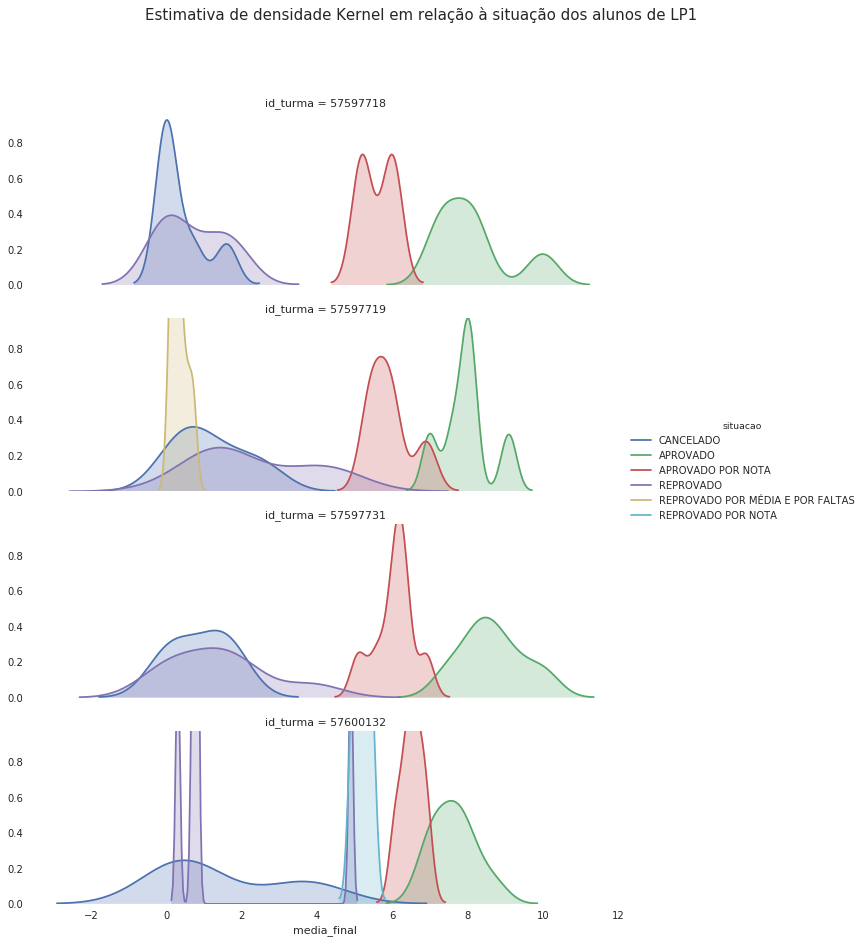

In [7]:
turmas_lp1 = turmas_imd[turmas_imd["codigo"].str.contains("IMD0030")]

codigo_lp1 = list(turmas_lp1['id_turma'].unique())

lista_alunos_lp1 = pd.DataFrame

lista_alunos_lp1 = alunos_total.loc[alunos_total["id_turma"].isin(codigo_lp1)].dropna()

lista_alunos_lp1 = lista_alunos_lp1.drop_duplicates(subset = "id_discente", keep="first").dropna()

# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(lista_alunos_lp1, row="id_turma", hue="situacao", size=3, aspect=3)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "media_final", shade=True)

g.add_legend()

sns.despine(left=True, bottom=True)

plt.suptitle("Estimativa de densidade Kernel em relação à situação dos alunos de LP1", 
             fontsize=15,
            y = 1.09)

plt.show()

____
#### 4. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos de histograma referente as médias finais de todas as turmas IMD0029 (Estrutura de dados I) consolidadas em 2017.1. Incremente nos gráficos linhas que descrevam a média e mediana da distribuição. 

Os valores para a turma 35M12 são:
Média: 3.55
Mediana: 2.50


Os valores para a turma 35T34 são:
Média: 6.01
Mediana: 6.15


Os valores para a turma 35N12 são:
Média: 3.57
Mediana: 4.00


Os valores para a turma 35N34 são:
Média: 2.14
Mediana: 0.45




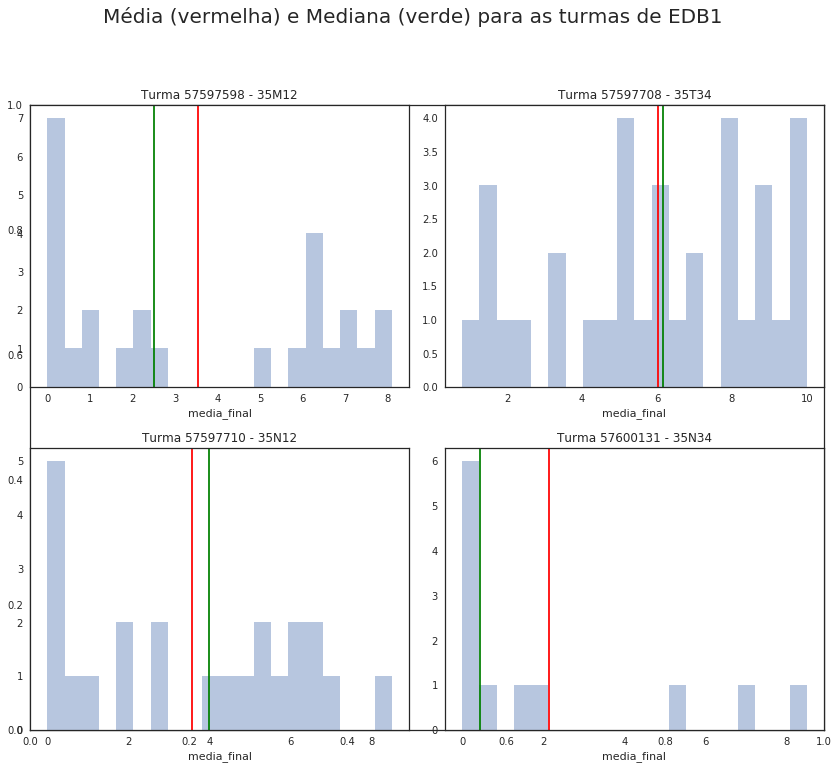

In [11]:
fig = plt.subplots(figsize=(12,10))

turmas_edb1 = turmas_imd[turmas_imd["codigo"].str.contains("IMD0029")]

codigo_edb1 = list(turmas_edb1['id_turma'].unique())
horario_edb1 = list(turmas_edb1['descricao_horario'].unique())

for i in range(len(horario_edb1)):
    horario_edb1[i] = str(horario_edb1[i]).split(' ', 1)[0]

lista_turmas_edb1 = []

for codigo in codigo_edb1:
    alunos_edb1 = alunos_total.loc[alunos_total["id_turma"] == codigo].dropna()
    alunos_edb1 = alunos_edb1.drop_duplicates(subset = "id_discente", keep="first").dropna()
    lista_turmas_edb1.append(alunos_edb1)

    
# main title
plt.suptitle("Média (vermelha) e Mediana (verde) para as turmas de EDB1", 
             fontsize=20,
            y = 1.09)

for i in range(len(codigo_edb1)):
    axe = fig[0].add_subplot(2,2,i+1)
    sns.distplot(lista_turmas_edb1[i]['media_final'], kde = False, ax=axe,bins=20)
    axe.axvline(lista_turmas_edb1[i]['media_final'].mean(), color="r")
    axe.axvline(lista_turmas_edb1[i]['media_final'].median(), color="g")
    axe.set_title("Turma " + str(codigo_edb1[i]) + " - " + horario_edb1[i])
    print('Os valores para a turma', horario_edb1[i], 'são:')
    print('Média:',"{0:.2f}".format(lista_turmas_edb1[i]['media_final'].mean()))
    print('Mediana:',"{0:.2f}".format(lista_turmas_edb1[i]['media_final'].median()))
    print('\n')


plt.tight_layout()
plt.show()

Analisando médias e medianas
---
Uma coisa que chama atenção é que, com exceção de uma turma, os valores de média e mediana geralmente ficaram abaixo da média de notas necessária para passar o que significa que uma parcela significativa de alunos costuma reprovar na disciplina. 
A mediana é mais fiel que a média em casos que temos muitos outliers, como na turma 35M12 e na turma 35N34, em que é possível ver um diferença grande entre os valores. Também há um alto número de 0's nas médias dos alunos, provavelmente por conta do trancamento ou abandono. Caso se inclua apenas os alunos que foram aprovados ou que foram reprovados por nota
